### Step 1. Loading Dataset
Load the `Prima Indians Onset of Diabates` dataset. It is a standard machine learning dataset available for free download from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as
0)


- NTP: Number of times pregnant.
- PGC: Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 3. Diastolic blood pressure (mm Hg).
- TSFT: Triceps skin fold thickness (mm).
- 2hSI: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index.
- DPF: Diabetes pedigree function.
- Age: Age (years).
- OnDiab: Class, onset of diabetes within five years.


- Set the dataset columns names to `['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab']`.
- Print the size of the data set.
- Print the first 10 observations of your data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
diabetes = pd.read_csv('data/diabetes.csv', 
    names=['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab'])
print(diabetes.shape) 
diabetes.head(10)

(768, 9)


,NTP,PGC,DBP,TSFT,2hSI,BMI,DPF,Age,OnDiab
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Step 2: Data type and description for each attribute
- Print the data type for each attribute using `dtypes` method of a pandas data frame
- Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The `describe()` function on the Pandas DataFrame lists 8 statistical properties of each attribute. They are: Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value.
- On classication problems you need to know how balanced the class values are. Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. You can quickly get an idea of the distribution of the `OnDiab` attribute in Pandas. Grup your data by `OnDiab` attribute and use the `size` method to count the number of different values of `class` attribute.

In [7]:
diabetes.dtypes

NTP         int64
PGC         int64
DBP         int64
TSFT        int64
2hSI        int64
BMI       float64
DPF       float64
Age         int64
OnDiab      int64
dtype: object

In [8]:
diabetes.describe()

,NTP,PGC,DBP,TSFT,2hSI,BMI,DPF,Age,OnDiab
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes.groupby('OnDiab').size()

OnDiab
0    500
1    268
dtype: int64

### Step 3: Draw the histogram of your data attributes.
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

- Use `hist()` method of pandas data frame to plot the histograms.

array([[<AxesSubplot:title={'center':'NTP'}>,
        <AxesSubplot:title={'center':'PGC'}>,
        <AxesSubplot:title={'center':'DBP'}>],
       [<AxesSubplot:title={'center':'TSFT'}>,
        <AxesSubplot:title={'center':'2hSI'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'OnDiab'}>]], dtype=object)

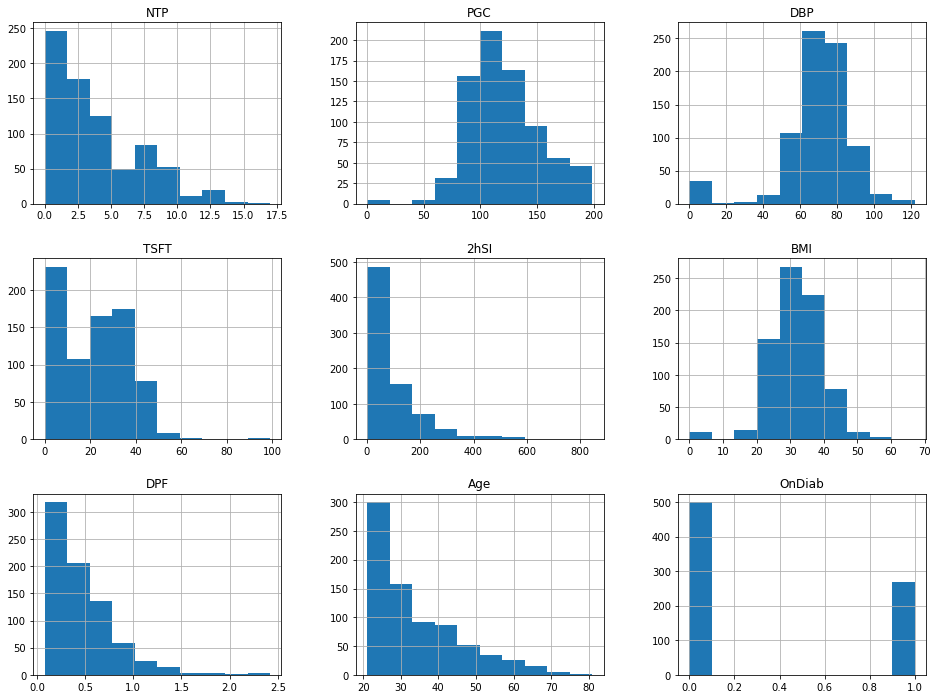

In [13]:
diabetes.hist(figsize=(16,12))

### Step 4: Running a Classifier
- Separate your dataset into feature set `X` and target variable `y`. Your target variable is `OnDiab`. 
- Split your dataset into train and test datasets, keep the test dataset size as 0.25 using `test_size` parameter of `train_test_split`. Set the random seed top 7 using `random_state` parameter of `train_test_split`. Make a stratified split.
- Train `KNearestNeighbor` classifer on your train dataset and print the score on the the test dataset. Set number of neighbors to 5.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = diabetes.drop('OnDiab',axis=1)
y = diabetes.loc[:,'OnDiab']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=7,
                                                    stratify = y)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)


0.7847222222222222

In [18]:
knn.score(X_test, y_test)

0.7395833333333334

### Step 5 : Grid Search
- Import `GridSearchCV` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1 to 30`, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score 
- Print the best parameter
- Print the test score

In [20]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = diabetes.drop('OnDiab',axis=1)
y = diabetes.loc[:,'OnDiab']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=7,
                                                    stratify = y)

In [21]:
param_grid = {'n_neighbors': np.arange(1,31)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [25]:
grid_search.score(X_train, y_train)

0.7760416666666666

In [23]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [24]:
grid_search.score(X_test, y_test)

0.71875